In [ ]:
with open('air_india.json','r') as air_india:
    air_india_json=json.load(air_india)
    print air_india_json

In [ ]:
import json


In [ ]:
air_india_json[0]


In [ ]:
count=0
for i in range(len(air_india_json)):
    if not air_india_json[i]['content']==None:
        count+=1
print count

In [ ]:
print len(air_india_json)

In [ ]:
def counting_function(field,jsn):
    count=0
    for i in range(len(jsn)):
        if not jsn[i][field]==None:
            count+=1
    return count
        

In [ ]:
fields=['cabin','content','date','destination','rating','route','title']
for field in fields:
    print field+": ",counting_function(field,new_air_india_json)

In [ ]:
new_air_india_json=[]
for i in range(len(air_india_json)):
    if not (air_india_json[i]['content']==None and air_india_json[i]['title']==None and  air_india_json[i]['rating']==None):
        new_air_india_json.append(air_india_json[i])


In [ ]:
with open('air_india.json','w') as new_air_india:
    json.dump(new_air_india_json,new_air_india)

In [ ]:
with open('jet_airways.json','r') as jet_airways:
    jet_airways_json=json.load(jet_airways)
    print jet_airways_json

In [ ]:
for field in fields:
    print field+": ",counting_function(field,jet_airways_json)

In [ ]:
new_jet_airways_json=[]
for i in range(len(jet_airways_json)):
    if not (jet_airways_json[i]['content']==None and jet_airways_json[i]['title']==None and jet_airways_json[i]['rating']==None):
        new_jet_airways_json.append(jet_airways_json[i])

In [ ]:
with open('jet_airways.json','w') as new_jet_airways:
    json.dump(new_jet_airways_json,new_jet_airways)

In [ ]:
def clean_json_data(airline_name):
    with open(airline_name,'r') as airline:
        airline_json=json.load(airline)
        fields=['cabin','content','date','destination','rating','route','title']
        print "Original"
        for field in fields:
            print field+": ",counting_function(field,airline_json)
        print "After clean up"
        new_airline_json=[]
        for i in range(len(airline_json)):
            if not (airline_json[i]['content']==None and airline_json[i]['title']==None and  airline_json[i]['rating']==None):
                new_airline_json.append(airline_json[i])
        for field in fields:
            print field+": ",counting_function(field,new_airline_json)


In [ ]:
clean_json_data('indigo.json')

In [ ]:
clean_json_data('spicejet.json')

In [ ]:
clean_json_data('goair.json')

# Preprocess data
## Removing stopwords
## Removing puctuation marks

In [ ]:
import nltk

from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
useless_words=['air','flight','airlin','goair','indigo','ground','jet','airways','they','i','jetairways','travel','also','took','spice jet','even','fli','also']

def preprocess(jsn):
    for i in range(len(jsn)):
        preprocessed_content=[]
        content=jsn[i]['content']
        if not content==None:
            content=content.split()
            for token in content:
                if token not in stop_words:
                    
                    preprocessed_content.append(token.lower())
            print preprocessed_content

In [ ]:
def read_json(airline_name):
    with open(airline_name,'r') as airline:
        airline_json=json.load(airline)
        return airline_json

In [ ]:
goair_json=read_json('goair.json')

In [ ]:
preprocess(goair_json)

In [ ]:
spicejet_json=read_json('spicejet.json')

In [ ]:
preprocess(spicejet_json)

In [ ]:
preprocess(read_json('air_india.json'))

In [ ]:
preprocess(read_json('indigo.json'))

In [ ]:
preprocess(read_json('jet_airways.json'))

In [ ]:
from nltk.stem.porter import PorterStemmer
from string import maketrans
porter_stemmer = PorterStemmer()   
import string
import json
def read_json(airline_name):
    with open(airline_name,'r') as airline:
        airline_json=json.load(airline)
        return airline_json
    
def preprocess(jsn):
    c=[]
    table = {ord(char): None for char in string.punctuation}
    for i in range(len(jsn)):
        preprocessed_content=[]
        content=jsn[i]['content']
        
        if not content==None:
            content=content.split()
            for token in content:
                if token not in stop_words and not token.lower().translate(table)=="aed":
                    
                    #print token.lower().translate(table)
                    preprocessed_content.append(porter_stemmer.stem(token.lower().translate(table)))
            c.append(preprocessed_content)
    return c

In [ ]:

def write_tokens(f,alt):
    with open(f,'w') as al:
        d={}
        for i in range(len(alt)):
            d[i]=alt[i]
        json.dump(d,al)
        

In [ ]:
write_tokens('jet_airways-token.json',preprocess(read_json('jet_airways.json')))

In [ ]:
write_tokens('indigo_tokens.json',preprocess(read_json('indigo.json')))

In [ ]:
write_tokens('spicejet_tokens.json',preprocess(read_json('spicejet.json')))

In [ ]:
write_tokens('goair_tokens.json',preprocess(read_json('goair.json')))

In [ ]:
from textblob import TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob

In [ ]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")

In [ ]:
testimonial.sentiment.polarity

In [ ]:
testimonial.classify

In [ ]:
import json
def calculate_polarity(file):
    d={}
    with open(file[:len(file)-5]+"_polarity.json",'w') as fp:
        with open(file,'r') as f :
            jsn=json.load(f)
            for i in range(len(jsn)):
                p=TextBlob(" ".join(jsn[str(i)])).sentiment.polarity
                d[" ".join(jsn[str(i)])]=p
            json.dump(d,fp)

In [ ]:
calculate_polarity('goair_tokens.json')

In [ ]:
def count_polarity(file):
    with open(file) as f:
        jsn=json.load(f)
        n=0
        p=0
        z=0
        for i in jsn.keys():
            if jsn[i]>0:
                p+=1
            if jsn[i]<0:
                n+=1
            if round(jsn[i],4)==0.0000:
                z+=1
        print("Positive : "+str(p),"Negative : "+str(n),"Nuetral : "+str(z),"Total : "+str(len(jsn.keys())))

In [ ]:
count_polarity('goair_tokens_polarity.json')

In [ ]:
calculate_polarity('air_india_tokens.json')

In [ ]:
count_polarity('air_india_tokens_polarity.json')

In [ ]:
calculate_polarity('jet_airways-token.json')
count_polarity('jet_airways-token_polarity.json')

In [ ]:
calculate_polarity('spicejet_tokens.json')
count_polarity('spicejet_tokens_polarity.json')

In [ ]:
calculate_polarity('indigo_tokens.json')
count_polarity('indigo_tokens_polarity.json')

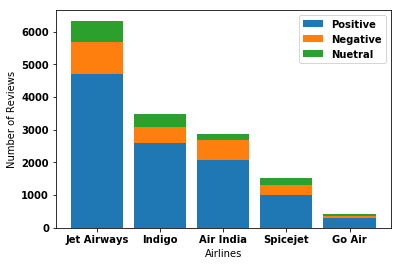

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [4695, 2597, 2070, 988, 289]
bars2 = [984, 483, 614, 310, 74]
bars3 = [655, 414, 189, 214, 61]
 
# Heights of bars1 + bars2 (TO DO better)
bars = [5679, 3080, 2684, 1298, 363]
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['Jet Airways','Indigo','Air India','Spicejet','Go Air']
barWidth = .825

 
# Create brown bars
p1=plt.bar(r, bars1, edgecolor='white', width=barWidth,lineWidth=0)
# Create green bars (middle), on top of the firs ones
p2=plt.bar(r, bars2, bottom=bars1, edgecolor='white', width=barWidth,lineWidth=0)
# Create green bars (top)
p3=plt.bar(r, bars3, bottom=bars, edgecolor='white', width=barWidth,lineWidth=0)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Airlines")
plt.ylabel("Number of Reviews")
plt.legend((p1[0], p2[0],p3[0]), ("Positive","Negative" ,'Nuetral'))
# Show graphic
plt.show()


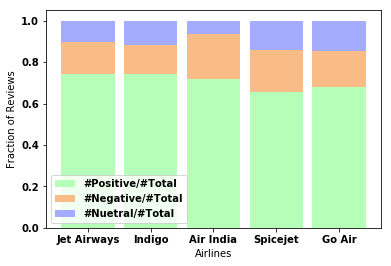

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [4695, 2597, 2070, 988, 289], 'orangeBars': [984, 483, 614, 310, 74],'blueBars':  [655, 414, 189, 214, 61]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j  for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j  for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j  for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85

names = ('Jet Airways','Indigo','Air India','Spicejet','Go Air')
# Create green Bars
p1=plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth,lineWidth=0)
# Create orange Bars
p2=plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth,lineWidth=0)
# Create blue Bars
p3=plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth,lineWidth=0)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Airlines")
plt.ylabel("Fraction of Reviews")
plt.legend((p1[0], p2[0],p3[0]), ("#Positive/#Total","#Negative/#Total" ,'#Nuetral/#Total'))
# Show graphic
plt.show()


In [ ]:
import re
import string
def frequency(file):
    frequency = {}
    ar=""
    with open(file, 'r') as f:
        jsn=json.load(f)
        for i in range(len(jsn)):
            r=" ".join(jsn[str(i)])
            ar=ar+" "+r
        match_pattern = re.findall(r'\b[a-z]+\b', ar)
        #print match_pattern
       
        for word in match_pattern: 
            count = frequency.get(word,0)
            frequency[word] = count + 1            
        frequency_list = frequency.keys()

        for words in frequency_list:
            if frequency[words]>=10:
                print(words, frequency[words])
        return ar


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=(s)
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
s2=frequency('goair_tokens.json')

In [ ]:
s3=frequency('indigo_tokens.json')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=(s2)
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=(s3)
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
useless_words=["go",'i','air','goair','flight','airline','goair','indigo','ground','jet','airways','they','if','jetairways','travel','also','took','spice jet','even','fli','also']
def preprocess(jsn):
    c=[]
    table = {ord(char): None for char in string.punctuation}
    for i in range(len(jsn)):
        preprocessed_content=[]
        content=jsn[i]['content']
        
        if not content==None:
            content=content.split()
            for token in content:
                #if token == 'goair':
                    #print(token)
                if not token.lower() in useless_words:
                    if token not in stop_words and not token.lower().translate(table)=="aed":
                        #print token.lower().translate(table)
                        preprocessed_content.append(porter_stemmer.stem(token.lower().translate(table)))
            c.append(preprocessed_content)
    return c

In [ ]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
import string
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()   

import json
write_tokens('goair_tokens.json',preprocess(read_json('goair.json')))
print(preprocess(read_json('goair.json')))


In [ ]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
import string
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()   

import json
write_tokens('indigo_tokens.json',preprocess(read_json('indigo.json')))


In [ ]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
import string
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()   

import json
write_tokens('air_india_tokens.json',preprocess(read_json('air_india.json')))


In [ ]:
air_india=frequency('air_india_tokens.json')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=(air_india)
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
import string
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()   

import json
write_tokens('jet_airways_tokens.json',preprocess(read_json('jet_airways.json')))


In [ ]:
jet_airways=frequency('jet_airways_tokens.json')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=(jet_airways)
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
import string
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()   

import json
write_tokens('spicejet_tokens.json',preprocess(read_json('spicejet.json')))


In [ ]:
spicejet=frequency('spicejet_tokens.json')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=(spicejet)
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [7]:
def reviews_with_parameter(par,file=None):
    p=0
    nu=0
    ne=0
    if file==None:
        with open('goair_tokens_polarity.json') as f:
            jsn=json.load(f)
            keys=jsn.keys()
            for key in keys:
                t=key.split()
                if par in t:
                    if jsn[key]>0:
                        p+=1
                    elif jsn[key]==0:
                        nu+=1
                    else:
                        ne+=1
        with open('air_india_tokens_polarity.json') as f:
            jsn=json.load(f)
            keys=jsn.keys()
            for key in keys:
                t=key.split()
                if par in t:
                    if jsn[key]>0:
                        p+=1
                    elif jsn[key]==0:
                        nu+=1
                    else:
                        ne+=1
        with open('indigo_tokens_polarity.json') as f:
            jsn=json.load(f)
            keys=jsn.keys()
            for key in keys:
                t=key.split()
                if par in t:
                    if jsn[key]>0:
                        p+=1
                    elif jsn[key]==0:
                        nu+=1
                    else:
                        ne+=1
        with open('jet_airways-token_polarity.json') as f:
            jsn=json.load(f)
            keys=jsn.keys()
            for key in keys:
                t=key.split()
                if par in t:
                    if jsn[key]>0:
                        p+=1
                    elif jsn[key]==0:
                        nu+=1
                    else:
                        ne+=1
        with open('spicejet_tokens_polarity.json') as f:
            jsn=json.load(f)
            keys=jsn.keys()
            for key in keys:
                t=key.split()
                if par in t:
                    if jsn[key]>0:
                        p+=1
                    elif jsn[key]==0:
                        nu+=1
                    else:
                        ne+=1
    else:
        with open(file) as f:
            jsn=json.load(f)
            keys=jsn.keys()
            for key in keys:
                t=key.split()
                if par in t:
                    if jsn[key]>0:
                        p+=1
                    elif jsn[key]==0:
                        nu+=1
                    else:
                        ne+=1
    return p,nu,ne

print("time:"+str(reviews_with_parameter('time')))
print("time:"+str(reviews_with_parameter("delay")))
print("time:"+str(reviews_with_parameter('hour')))
print("money:"+str(reviews_with_parameter('money')))
print("money:"+str(reviews_with_parameter('cost')))
print("staff:"+str(reviews_with_parameter('staff')))
print("food:"+str(reviews_with_parameter('food')))
print('turbulence'+str(reviews_with_parameter('turbul')))
print('service'+str(reviews_with_parameter('service')))
print('service'+str(reviews_with_parameter('servic')))
print('seat'+str(reviews_with_parameter('seat')))
print('crew'+str(reviews_with_parameter('crew')))


time:(4263, 507, 781)
time:(995, 247, 457)
time:(666, 167, 396)
money:(300, 55, 53)
money:(430, 44, 76)
staff:(2532, 299, 531)
food:(3168, 167, 490)
turbulence(66, 5, 12)
service(161, 5, 35)
service(3561, 293, 519)
seat(2073, 237, 505)
crew(1595, 147, 236)


In [2]:
import json

In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# y-axis in bold
rc('font', weight='bold')

# Values of each group
bars1 = [4263+995+666, 300+430, 2532+161+3561+1595, 3168, 66,2073]
bars2 = [507+247+167, 55+44, 299+5+293+147, 167, 5,237]
bars3 = [781+457+396, 53+76, 531+35+519+236, 490, 12,236]

# Heights of bars1 + bars2 (TO DO better)
bars = [4263+995+666+507+247+167,300+430+55+44,2532+161+3561+1595+299+5+293+147,3168+167, 66+5,2073+237]

# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
#bottom, width, height=0.8, left=None, hold=None
# Names of group and bar width
names = ['Time Delay','Value for money','Staff','Food','Turbulence','Aircraft condition']
barWidth = 1

# Create brown bars
plt.barh(r,width=bars1,color='#7f6d5f',height=1, edgecolor='white')
# Create green bars (middle), on top of the firs ones
plt.barh(r,width=bars2, left=bars1, height=1,color='#557f2d', edgecolor='white')
# Create green bars (top)
plt.barh(r,width=bars3, left=bars, height=1,color='#2d7f5e', edgecolor='white')

# Custom X axis
plt.xticks(names, fontweight='bold')
plt.xlabel("group")

# Show graphic
plt.show()
#(300, 55, 53) (430, 44, 76)

KeyboardInterrupt: 

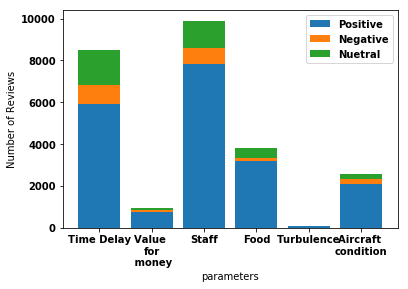

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [4263+995+666, 300+430, 2532+161+3561+1595, 3168, 66,2073]
bars2 = [507+247+167, 55+44, 299+5+293+147, 167, 5,237]
bars3 = [781+457+396, 53+76, 531+35+519+236, 490, 12,236]
 
# Heights of bars1 + bars2 (TO DO better)
bars = [4263+995+666+507+247+167,300+430+55+44,2532+161+3561+1595+299+5+293+147,3168+167, 66+5,2073+237]
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = ['Time Delay','Value \nfor\n money','Staff','Food','Turbulence','Aircraft \ncondition']
barWidth = .8

 
# Create brown bars
p1=plt.bar(r, bars1, edgecolor='white', width=barWidth,lineWidth=0)
# Create green bars (middle), on top of the firs ones
p2=plt.bar(r, bars2, bottom=bars1, edgecolor='white', width=barWidth,lineWidth=0)
# Create green bars (top)
p3=plt.bar(r, bars3, bottom=bars, edgecolor='white', width=barWidth,lineWidth=0)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("parameters")
plt.ylabel("Number of Reviews")
plt.legend((p1[0], p2[0],p3[0]), ("Positive","Negative" ,'Nuetral'))
# Show graphic
plt.show()


In [10]:
print("time:"+str(reviews_with_parameter('time',"spicejet_tokens_polarity.json")))
print("time:"+str(reviews_with_parameter("delay","spicejet_tokens_polarity.json")))
print("time:"+str(reviews_with_parameter('hour',"spicejet_tokens_polarity.json")))
print("money:"+str(reviews_with_parameter('money',"spicejet_tokens_polarity.json")))
print("money:"+str(reviews_with_parameter('cost',"spicejet_tokens_polarity.json")))
print("staff:"+str(reviews_with_parameter('staff',"spicejet_tokens_polarity.json")))
print("food:"+str(reviews_with_parameter('food',"spicejet_tokens_polarity.json")))
print('turbulence'+str(reviews_with_parameter('turbul',"spicejet_tokens_polarity.json")))
print('service'+str(reviews_with_parameter('service',"spicejet_tokens_polarity.json")))
print('service'+str(reviews_with_parameter('servic',"spicejet_tokens_polarity.json")))
print('seat'+str(reviews_with_parameter('seat',"spicejet_tokens_polarity.json")))
print('crew'+str(reviews_with_parameter('crew',"spicejet_tokens_polarity.json")))

time:(409, 78, 103)
time:(125, 48, 71)
time:(73, 30, 44)
money:(52, 13, 18)
money:(83, 12, 17)
staff:(217, 32, 73)
food:(204, 19, 30)
turbulence(2, 0, 5)
service(0, 0, 0)
service(296, 43, 60)
seat(224, 36, 76)
crew(137, 15, 21)


In [12]:
print("time:"+str(reviews_with_parameter('time',"indigo_tokens_polarity.json")))
print("time:"+str(reviews_with_parameter("delay","indigo_tokens_polarity.json")))
print("time:"+str(reviews_with_parameter('hour',"indigo_tokens_polarity.json")))
print("money:"+str(reviews_with_parameter('money',"indigo_tokens_polarity.json")))
print("money:"+str(reviews_with_parameter('cost',"indigo_tokens_polarity.json")))
print("staff:"+str(reviews_with_parameter('staff',"indigo_tokens_polarity.json")))
print("food:"+str(reviews_with_parameter('food',"indigo_tokens_polarity.json")))
print('turbulence'+str(reviews_with_parameter('turbul',"indigo_tokens_polarity.json")))
print('service'+str(reviews_with_parameter('service',"indigo_tokens_polarity.json")))
print('service'+str(reviews_with_parameter('servic',"indigo_tokens_polarity.json")))
print('seat'+str(reviews_with_parameter('seat',"indigo_tokens_polarity.json")))
print('crew'+str(reviews_with_parameter('crew',"indigo_tokens_polarity.json")))

time:(1395, 164, 199)
time:(247, 64, 83)
time:(112, 32, 52)
money:(104, 18, 10)
money:(188, 13, 25)
staff:(676, 85, 118)
food:(448, 30, 63)
turbulence(21, 2, 1)
service(0, 0, 0)
service(849, 78, 86)
seat(471, 56, 81)
crew(378, 45, 46)


In [14]:
f="jet_airways-token_polarity.json"
print("time:"+str(reviews_with_parameter('time',f)))
print("time:"+str(reviews_with_parameter("delay",f)))
print("time:"+str(reviews_with_parameter('hour',f)))
print("money:"+str(reviews_with_parameter('money',f)))
print("money:"+str(reviews_with_parameter('cost',f)))
print("staff:"+str(reviews_with_parameter('staff',f)))
print("food:"+str(reviews_with_parameter('food',f)))
print('turbulence'+str(reviews_with_parameter('turbul',f)))
print('service'+str(reviews_with_parameter('service',f)))
print('service'+str(reviews_with_parameter('servic',f)))
print('seat'+str(reviews_with_parameter('seat',f)))
print('crew'+str(reviews_with_parameter('crew',f)))

time:(1666, 177, 293)
time:(387, 86, 192)
time:(274, 69, 178)
money:(92, 12, 8)
money:(102, 12, 23)
staff:(1142, 129, 185)
food:(1666, 97, 224)
turbulence(34, 3, 6)
service(0, 0, 0)
service(1807, 134, 240)
seat(911, 104, 209)
crew(776, 74, 99)


In [15]:
f="goair_tokens_polarity.json"
print("time:"+str(reviews_with_parameter('time',f)))
print("time:"+str(reviews_with_parameter("delay",f)))
print("time:"+str(reviews_with_parameter('hour',f)))
print("money:"+str(reviews_with_parameter('money',f)))
print("money:"+str(reviews_with_parameter('cost',f)))
print("staff:"+str(reviews_with_parameter('staff',f)))
print("food:"+str(reviews_with_parameter('food',f)))
print('turbulence'+str(reviews_with_parameter('turbul',f)))
print('service'+str(reviews_with_parameter('service',f)))
print('service'+str(reviews_with_parameter('servic',f)))
print('seat'+str(reviews_with_parameter('seat',f)))
print('crew'+str(reviews_with_parameter('crew',f)))

time:(112, 29, 23)
time:(46, 16, 18)
time:(18, 4, 7)
money:(9, 8, 2)
money:(14, 1, 3)
staff:(80, 20, 16)
food:(41, 3, 11)
turbulence(1, 0, 0)
service(0, 0, 0)
service(88, 9, 8)
seat(74, 13, 17)
crew(37, 5, 7)


In [17]:
f="air_india_tokens_polarity.json"
print("time:"+str(reviews_with_parameter('time',f)))
print("time:"+str(reviews_with_parameter("delay",f)))
print("time:"+str(reviews_with_parameter('hour',f)))
print("money:"+str(reviews_with_parameter('money',f)))
print("money:"+str(reviews_with_parameter('cost',f)))
print("staff:"+str(reviews_with_parameter('staff',f)))
print("food:"+str(reviews_with_parameter('food',f)))
print('turbulence'+str(reviews_with_parameter('turbul',f)))
print('service'+str(reviews_with_parameter('service',f)))
print('service'+str(reviews_with_parameter('servic',f)))
print('seat'+str(reviews_with_parameter('seat',f)))
print('crew'+str(reviews_with_parameter('crew',f)))

time:(681, 59, 163)
time:(190, 33, 93)
time:(189, 32, 115)
money:(43, 4, 15)
money:(43, 6, 8)
staff:(417, 33, 139)
food:(809, 18, 162)
turbulence(8, 0, 0)
service(161, 5, 35)
service(521, 29, 125)
seat(393, 28, 122)
crew(267, 8, 63)


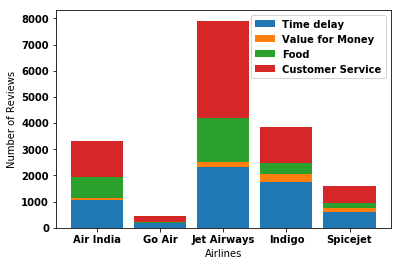

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
# Values of each group
bars1 = [681+190+189, 112+46+18, 1666+387+274, 1395+247+112,409+125+73]#time
bars2 = [43+43, 9+14, 92+102, 104+188,52+83 ]#money
bars3 = [809, 41, 1666, 448, 204]#food
bars4 =  [417+161+521+267,80+88+37,1142+1807+776,417+161+521+267,217+296+137] #service
# Heights of bars1 + bars2 
bars = [681+190+189+43+43+809, 112+46+18+9+14+41,1666+387+274+92+102+1666, 1395+247+112+ 104+188+448, 409+125+73+52+83+204]
bars_h=[681+190+189+43+43, 112+46+18+9+14,1666+387+274+92+102, 1395+247+112+ 104+188, 409+125+73+52+83] 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['Air India','Go Air','Jet Airways','Indigo','Spicejet']
barWidth = .825

 
# Create brown bars
p1=plt.bar(r, bars1, edgecolor='white', width=barWidth,lineWidth=0)
# Create green bars (middle), on top of the firs ones
p2=plt.bar(r, bars2, bottom=bars1, edgecolor='white', width=barWidth,lineWidth=0)
# Create green bars (top)
p3=plt.bar(r, bars3, bottom=bars_h, edgecolor='white', width=barWidth,lineWidth=0)

p4=plt.bar(r, bars4,bottom=bars,edgecolor='white',width=barWidth,lineWidth=0)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Airlines")
plt.ylabel("Number of Reviews")
plt.legend((p1[0], p2[0],p3[0],p4[0]), ("Time delay","Value for Money" ,'Food','Customer Service'))
# Show graphic
plt.show()


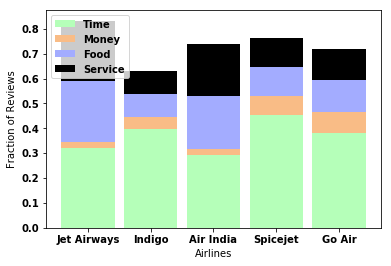

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [681+190+189, 112+46+18, 1666+387+274, 1395+247+112,409+125+73], 'orangeBars': [43+43, 9+14, 92+102, 104+188,52+83],'blueBars':  [809, 41, 1666, 448, 204], 'yellowBars':[417+161+521+267,80+88+37,1142+1807+776,417+161+521+267,217+296+137]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['yellowBars'])]
greenBars = [i / j  for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j  for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j  for i,j in zip(df['blueBars'], totals)]
yellowBars = [i/j for i,j in zip(df['yellowBars'],totals)]
 
# plot
barWidth = 0.85

names = ('Jet Airways','Indigo','Air India','Spicejet','Go Air')
# Create green Bars
p1=plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth,lineWidth=0)
# Create orange Bars
p2=plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth,lineWidth=0)
# Create blue Bars
p3=plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth,lineWidth=0)
 
p4=plt.bar(r, blueBars, bottom=[i+j+k for i,j,k in zip(greenBars,orangeBars,blueBars)], color='black', edgecolor='white', width=barWidth,lineWidth=0)    
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Airlines")
plt.ylabel("Fraction of Reviews")
plt.legend((p1[0], p2[0],p3[0],p4[0]), ("Time","Money" ,'Food','Service'))
# Show graphic
plt.show()
